In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Отчет

In [2]:
# Загрузить ДФ
fdf = pd.read_csv('report.csv')
pd.set_option('display.max_columns', None)

# Полученные данные после первичной обработки

In [3]:
fdf

,Unnamed: 0,ID объявления,Количество комнат,Метро,"Общая площадь, м2","Площадь кухни, м2",Этаж,Этажей в доме,Тип строения,Парковка,Квартплата,Залог,комм,Срок,Предоплата,Ремонт,Балкон,Лоджия,Окна,Санузел раздельный,Санузел совмещенный,Можно с детьми/животными,"Высота потолков, м",Лифты пасс.,Лифты груз.,Мусоропровод
0,0,271271157,4,Смоленская,200.0,20.0,5,16,Монолитный,подземная,500000.0,500000,0.000,Срок аренды - Длительный,1,Дизайнерский,0,0,0,0,0,"Можно с детьми, Можно с животными",3.00,4,1,Да
1,1,271634126,4,Смоленская,198.0,18.0,5,16,Монолитно-кирпичный,подземная,500000.0,500000,0.000,Срок аренды - Длительный,1,Дизайнерский,0,0,На улицу и двор,2,1,Можно с детьми,3.50,1,1,Нет
2,2,271173086,4,Смоленская,200.0,4.0,5,16,0,подземная,500000.0,500000,5160.697,Срок аренды - Длительный,1,Евроремонт,0,0,На улицу и двор,3,0,Можно с детьми,3.20,1,0,0
3,3,272197456,4,Смоленская,170.0,17.0,5,6,0,подземная,400000.0,400000,5160.697,Срок аренды - Длительный,1,Евроремонт,0,0,На улицу и двор,3,0,Можно с животными,3.20,1,0,0
4,4,273614615,2,Арбатская,58.0,5.0,12,26,Панельный,0,225000.0,225000,0.000,Срок аренды - Длительный,1,Евроремонт,0,0,На улицу и двор,2,0,0,3.90,1,1,Да
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23363,23363,215565511,0,Говорово,35.0,8.0,10,14,0,0,42000.0,42000,0.000,Срок аренды - Длительный,1,Евроремонт,1,0,0,1,0,0,0.00,1,1,0
23364,23364,274654844,1,Солнцево,38.7,11.0,5,18,Монолитный,0,45000.0,45000,0.000,Срок аренды - Длительный,1,Евроремонт,1,0,Во двор,1,0,0,0.00,1,1,0
23365,23365,268679909,2,Солнцево,43.1,43.1,5,5,Кирпичный,0,50000.0,50000,0.000,Срок аренды - Длительный,1,Дизайнерский,1,0,На улицу и двор,1,0,Можно с детьми,0.00,0,0,0
23366,23366,274807525,2,Солнцево,52.5,10.0,8,23,Монолитный,наземная,55000.0,50000,0.000,Срок аренды - Длительный,2,Евроремонт,1,0,Во двор,1,1,0,2.65,3,0,Да


Для построения графиков  отфильтруем наш датасет, убрав из него нулевые значения

In [17]:
plt.style.use('ggplot')

fdf_filter = fdf[
    (fdf['Квартплата'] != 0) &
    (fdf['комм'] != 0) &
    (fdf['Тип строения'] != '0') &
    (fdf['Метро'] != '0') & 
    (fdf['Парковка'] != '0') & 
    (fdf['Ремонт'] != '0') &
    (fdf['Окна'] != '0') &
    (fdf['Можно с детьми/животными'] != '0') &
    (fdf['Мусоропровод'] != '0') &
    (fdf['Залог'] != 0) & 
    (fdf['Высота потолков, м'] != '0') 
]

## 1. Посмотрим как зависит Квартплата от коммуналки и типа строения

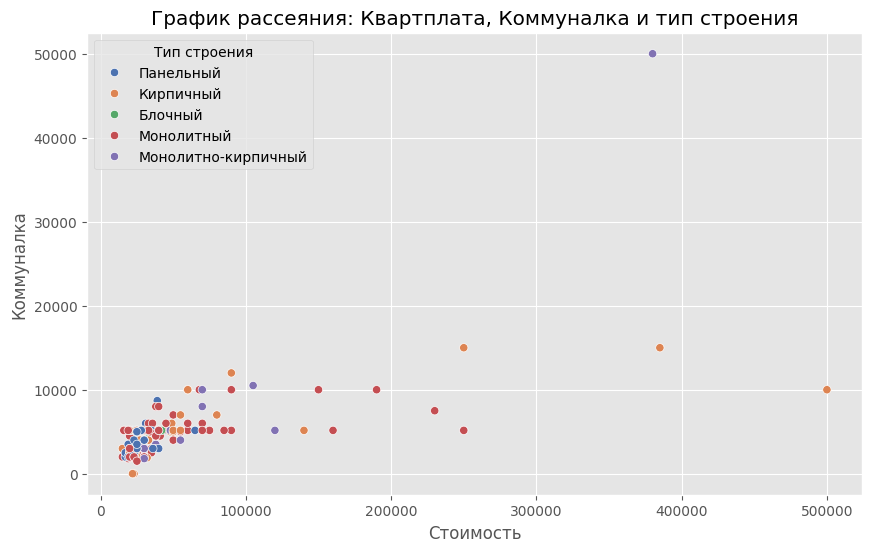

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=fdf_filter, x='Квартплата', y='комм', hue='Тип строения', palette='deep')
# Настройка графика
plt.title('График рассеяния: Квартплата, Коммуналка и тип строения')
plt.xlabel('Стоимость')
plt.ylabel('Коммуналка')
plt.legend(title='Тип строения');

## На данный момент заметен сильный разрыв в значениях, т.к. еще не исследовались данные на выбросы. 
## Давайте тогда построим ящик с усами и посмотрим выбросы у Квартплаты и Залога. 

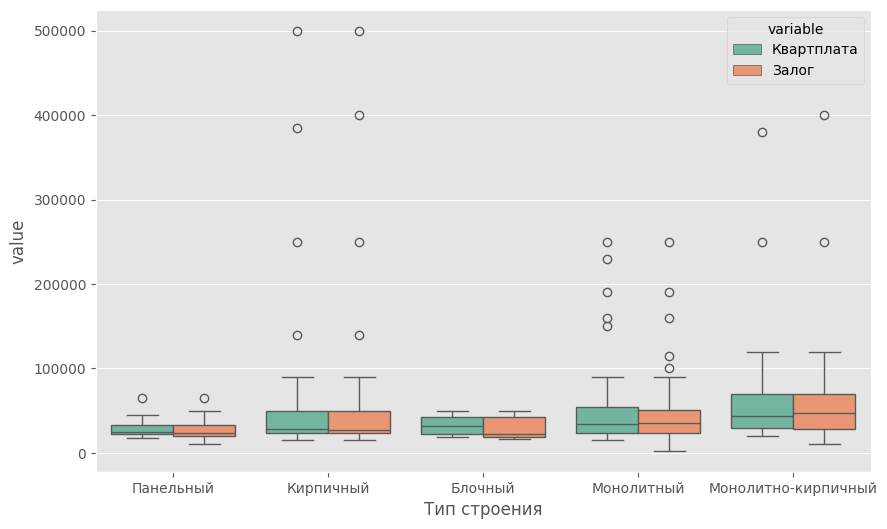

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=fdf_filter.melt(id_vars='Тип строения', value_vars=['Квартплата', 'Залог']), 
             x='Тип строения', y='value', hue='variable', palette='Set2');

## Построим еще одни усы. В этот раз для коммуналка/тип строения

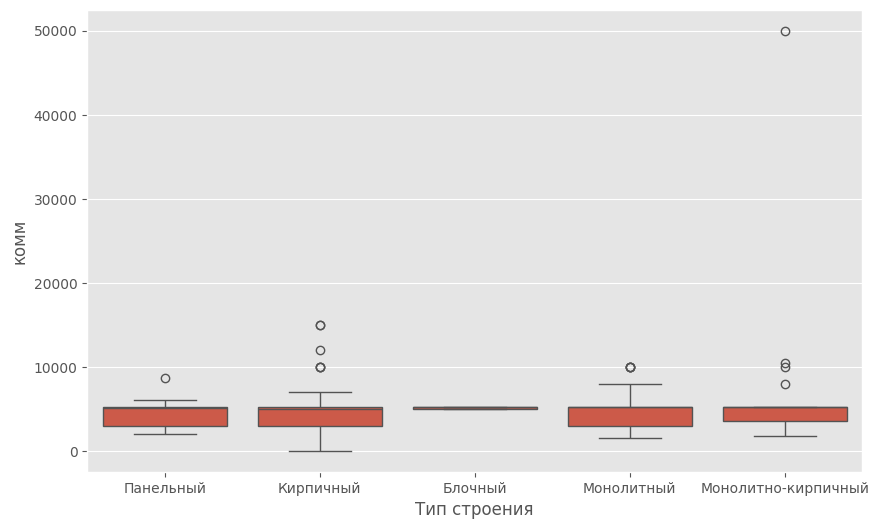

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=fdf_filter, x='Тип строения', y = 'комм');

## Посмотрим график для построения гипотезы: увеличивается ли коммуналка в зависимости от площади

Text(0, 0.5, 'Коммуналка')

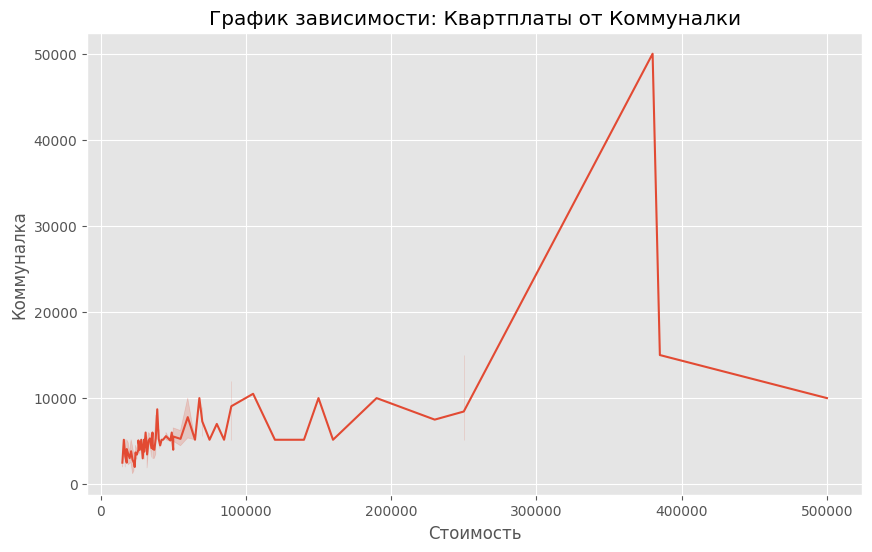

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(data = fdf_filter, x = 'Квартплата', y = 'комм');
# Настройка графика
plt.title('График зависимости: Квартплаты от Коммуналки')
plt.xlabel('Стоимость')
plt.ylabel('Коммуналка')

# Рассмотрим несколько гистограмм

Text(0.5, 1.0, 'Гистограмма. Наличие парковки')

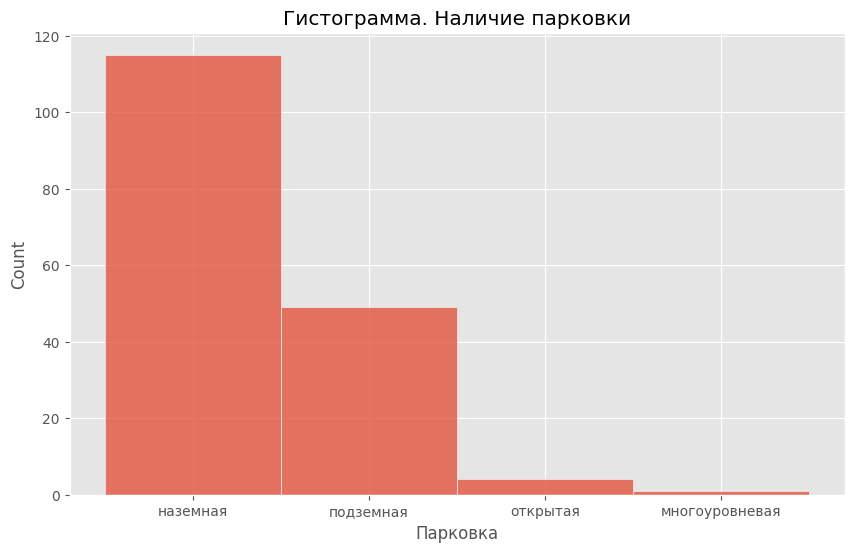

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data = fdf_filter, x = 'Парковка');
plt.title('Гистограмма. Наличие парковки')

Text(0.5, 1.0, 'Гистограмма. Наличие ремонта')

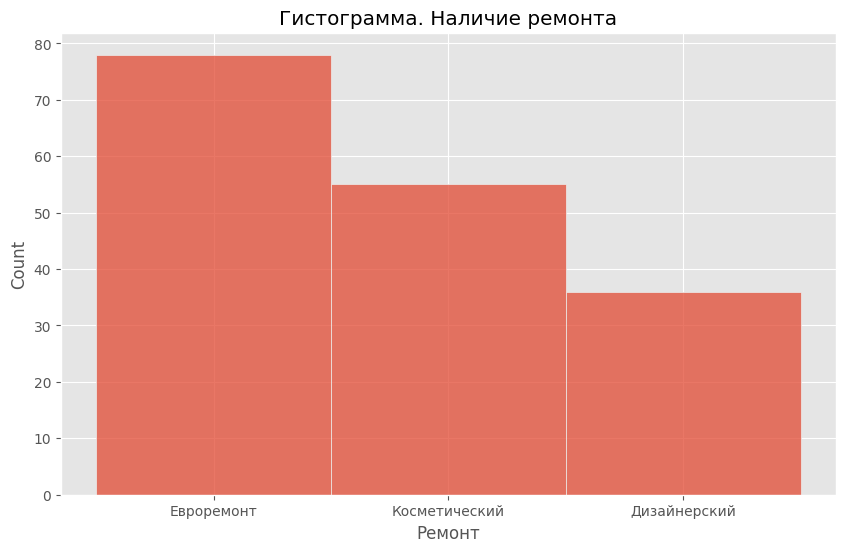

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data = fdf_filter, x = 'Ремонт');
plt.title('Гистограмма. Наличие ремонта')

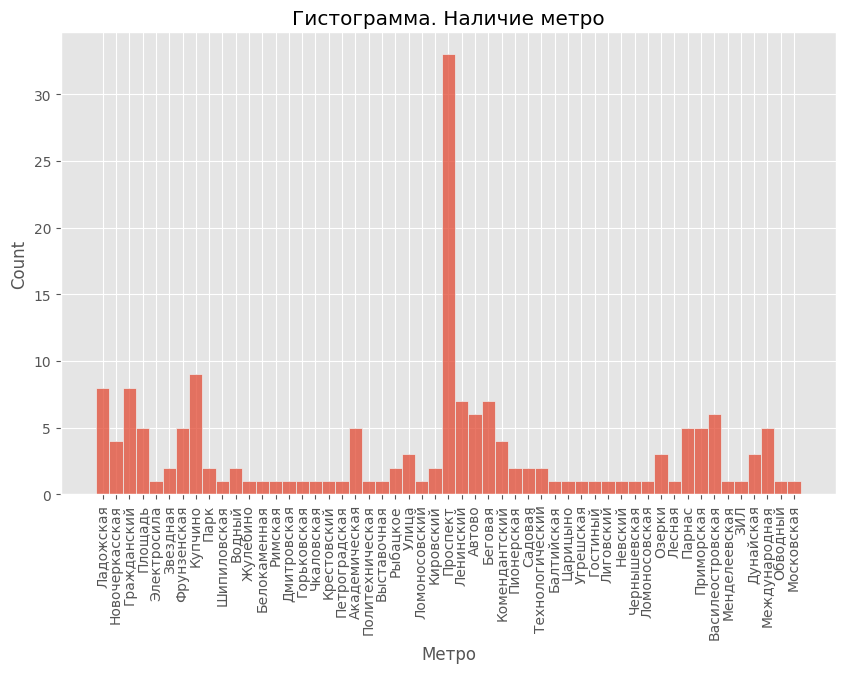

In [102]:
plt.figure(figsize=(10, 6))
sns.histplot(data = fdf_filter, x = 'Метро');
plt.title('Гистограмма. Наличие метро')
plt.xticks(rotation=90);

## Рассмотрим график распределения
### попробуем построить гипотезу: зависит ли срок аренды от площади квартиры? чем меньше срок аренды тем меньше площадь?

Text(0, 0.5, 'Общая площадь, м2')

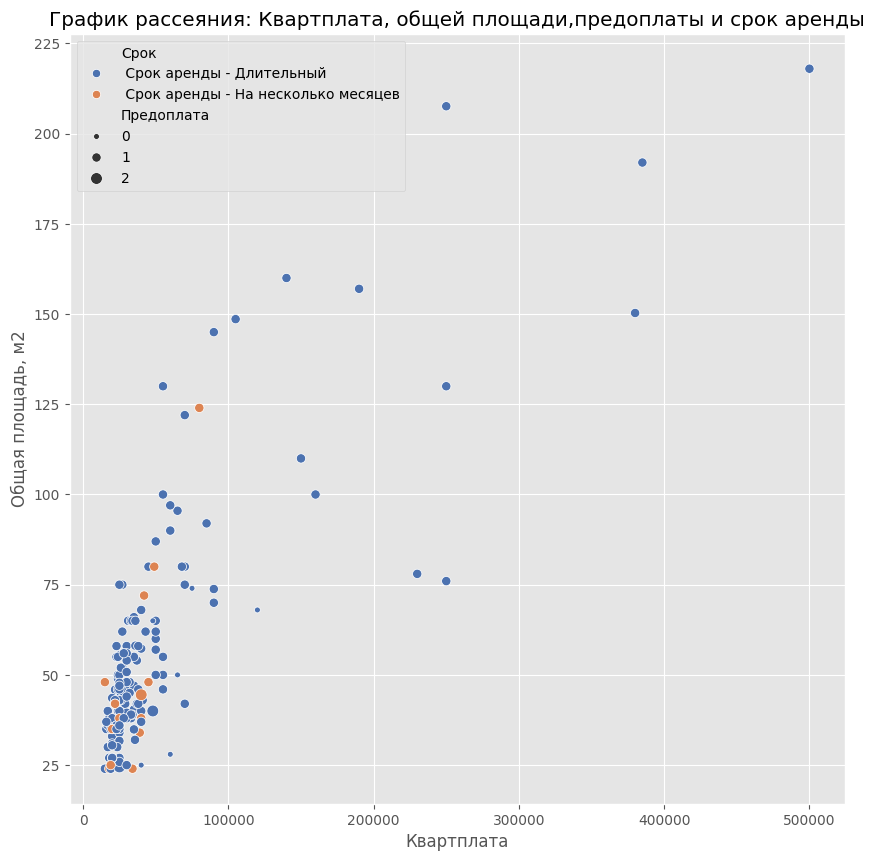

In [25]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=fdf_filter, x='Квартплата', y='Общая площадь, м2', hue='Срок', size = 'Предоплата', palette='deep')
# Настройка графика
plt.title('График рассеяния: Квартплата, общей площади,предоплаты и срок аренды')
plt.xlabel('Квартплата')
plt.ylabel('Общая площадь, м2')

### Посмотрим зависит ли стоимость от количества этажей в доме. 
(кажется даже без учета выбросов заметно, что чем меньше этажей в доме, тем он дороже, но эта гипотеза которой требуется проверка)

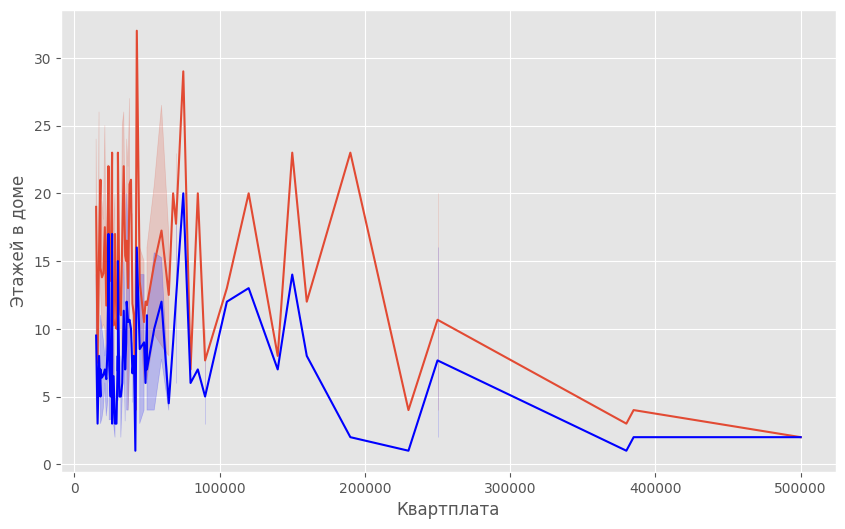

In [26]:

plt.figure(figsize=(10, 6))
sns.lineplot(data = fdf_filter, x = 'Квартплата', y = 'Этажей в доме');
sns.lineplot(data = fdf_filter, x = 'Квартплата', y = 'Этаж', color = 'blue');

### Гипотеза: увеличивается ли коммуналка от площади квартиры - ответ нет, но стоит проверить после "очистки" данных

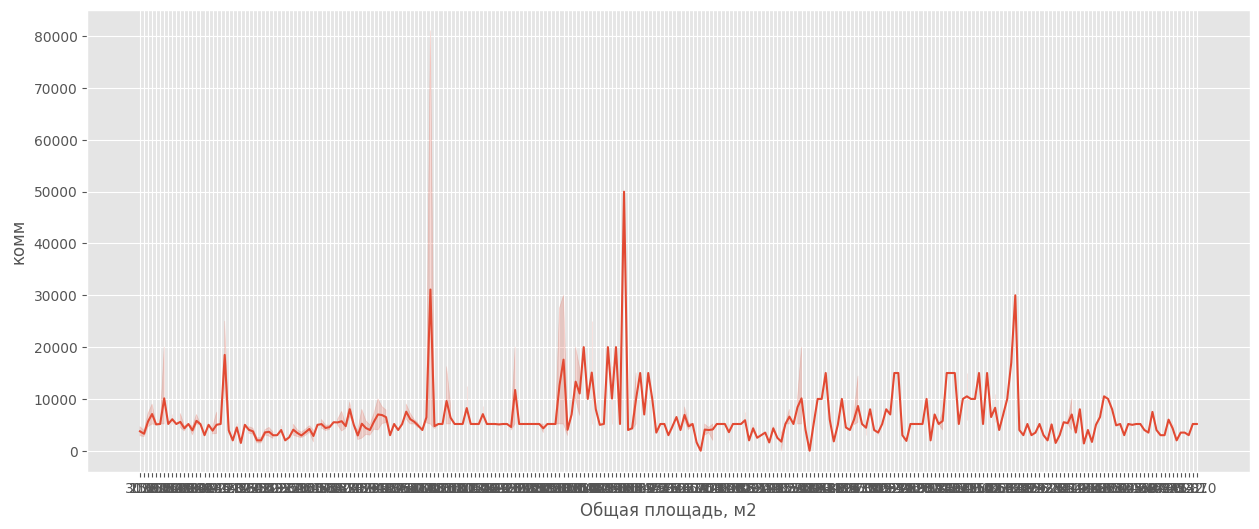

In [158]:
plt.figure(figsize=(15, 6))
sns.lineplot(data = fdf_filter, x = 'Общая площадь, м2', y = 'комм');

## Для более достоверных сведений необходимо:
1. Удалить выбросы у Квартплаты, Залога, Коммуналки, Высота потолка
2. Для построения дальнейших зависимостей перевести данные в численные характеристики
3. Заполнить 0 значениями (при возможности)

# Гипотезы:
1. Чем меньше этажей в доме, тем дороже квартплата
2. Самый "популярный" вариант среди обявлений это квартиры размером 40-60 м2
3. Увеличивается ли коммуналка с увеличением площади квартиры
4. Зависит ли срок аренды от площади квартиры? чем меньше срок аренды тем меньше площадь?¶

# Планы:
1. Построение тепловой карты и пр. зависимостей
2. Проверка гипотез после "очистки данных"